# Polynomial Regression

## Importing the dataset

In [1]:
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]
dataset

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


## Fitting Linear Regression to the dataset

In [4]:
lin_reg = lm(formula=Salary ~ .,
             data=dataset)
lin_reg


Call:
lm(formula = Salary ~ ., data = dataset)

Coefficients:
(Intercept)        Level  
    -195333        80879  


## Fitting Polynomial Regression to the dataset

In [6]:
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4
dataset

Level,Salary,Level2,Level3,Level4
1,45000,1,1,1
2,50000,4,8,16
3,60000,9,27,81
4,80000,16,64,256
5,110000,25,125,625
6,150000,36,216,1296
7,200000,49,343,2401
8,300000,64,512,4096
9,500000,81,729,6561
10,1000000,100,1000,10000


In [7]:
poly_reg = lm(formula=Salary ~ .,
              data=dataset)
poly_reg


Call:
lm(formula = Salary ~ ., data = dataset)

Coefficients:
(Intercept)        Level       Level2       Level3       Level4  
   184166.7    -211002.3      94765.4     -15463.3        890.2  


## Visualising the Linear Regression results

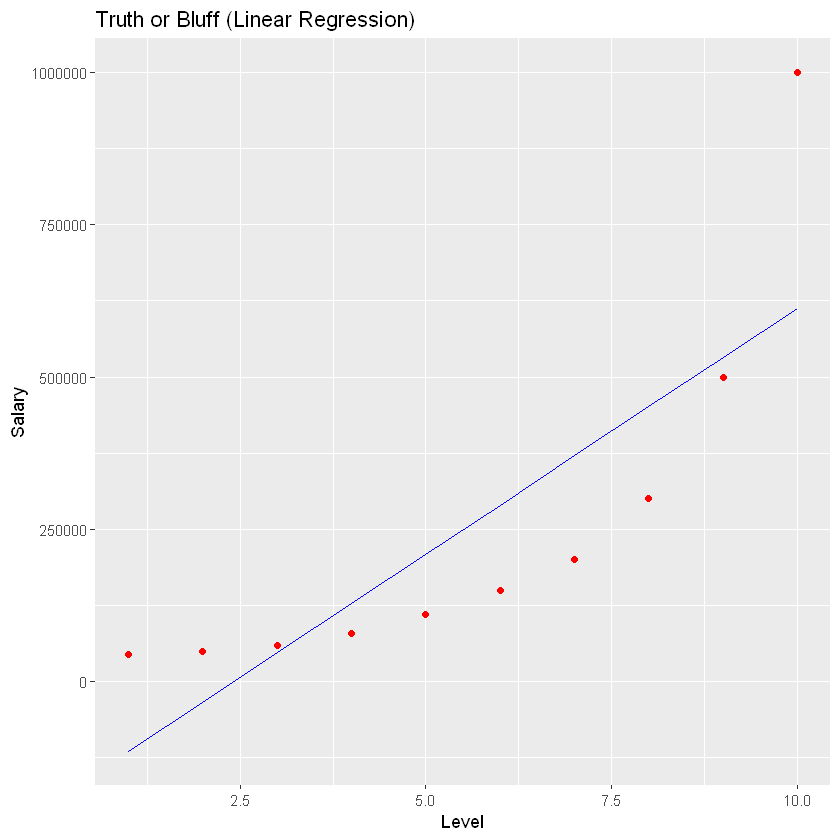

In [10]:
library(ggplot2)
ggplot() +
geom_point(aes(x=dataset$Level, y=dataset$Salary), colour='red') +
geom_line(aes(x=dataset$Level, y=predict(lin_reg, newdata=dataset)), colour='blue') +
ggtitle('Truth or Bluff (Linear Regression)') +
xlab('Level') +
ylab('Salary')

## Visualising the Polynomial Regression results

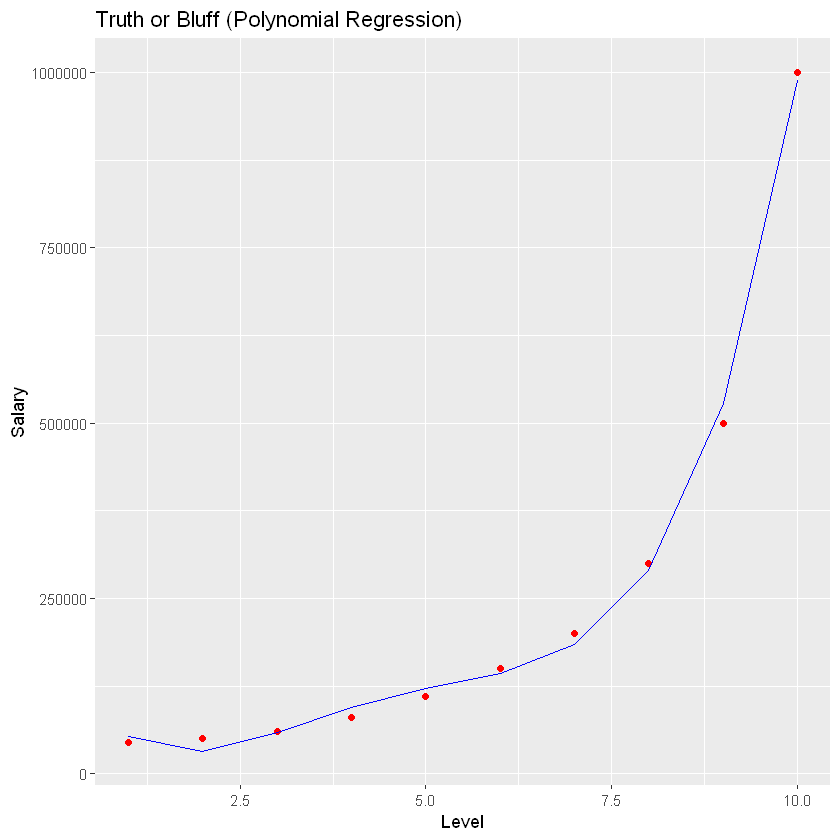

In [13]:
library(ggplot2)
ggplot() +
geom_point(aes(x=dataset$Level, y=dataset$Salary), colour='red') +
geom_line(aes(x=dataset$Level, y=predict(poly_reg, newdata=dataset)), colour='blue') +
ggtitle('Truth or Bluff (Polynomial Regression)') +
xlab('Level') +
ylab('Salary')

## Visualising the Regression Model results (for higher resolution and smoother curve)

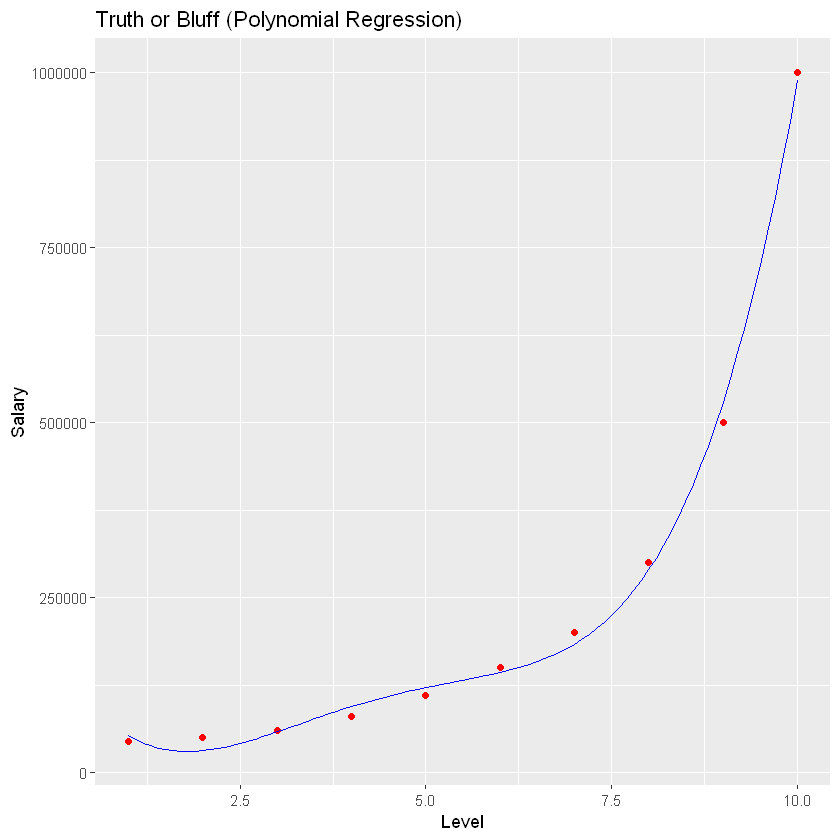

In [15]:
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
geom_point(aes(x=dataset$Level, y=dataset$Salary), colour='red') +
geom_line(aes(x=x_grid, y=predict(poly_reg, newdata=data.frame(Level=x_grid,
                                                               Level2=x_grid^2,
                                                               Level3=x_grid^3,
                                                               Level4=x_grid^4))),
          colour='blue') +
ggtitle('Truth or Bluff (Polynomial Regression)') +
xlab('Level') +
ylab('Salary')

## Predicting a new result with Linear Regression

In [16]:
predict(lin_reg, data.frame(Level=6.5))

1 
330378.8

## Predicting a new result with Polynomial Regression

In [17]:
predict(poly_reg, data.frame(Level=6.5,
                             Level2=6.5^2,
                             Level3=6.5^3,
                             Level4=6.5^4))

1 
158862.5